# EMPLOYEE TURNOVER USING SURVIVAL ANALYSIS

# Importing Libraries

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\akash sharma\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\akash sharma\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pandas-profiling


You should consider upgrading via the 'c:\users\akash sharma\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


#Before installing pandas profiling module, you should have install Microsoft visual studio 2019 in your desktop > Modify > Workloads > Desktop development with C++ then download and install all the files that it will suggest ,otherwise you will be getting an error.
Use this link : https://visualstudio.microsoft.com/downloads/ (Download the community version)

In [4]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\akash sharma\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\akash sharma\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import statistics

from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')



c:\users\akash sharma\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing the data file

In [7]:
df=pd.read_excel("turnover-Dataset.xlsx")
df.head(5)

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,Joining date
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3,2012-11-15
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3,2012-09-27
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3,2012-09-24
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7,2013-12-08
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7,2013-08-10


In [8]:
df['Joining date']=df['Joining date'].astype(str)

In [9]:
df[['Unnamed: 17','Unnamed: 18','Unnamed: 19']]=df['Joining date'].str.split('-',expand=True)

In [10]:
df.rename(columns={'Unnamed: 17' : 'Year','Unnamed: 18' : 'Month','Unnamed: 19' : 'Date'},inplace=True)

In [11]:
df.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
Joining date     object
Year             object
Month            object
Date             object
dtype: object

In [12]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Date'].astype(int)

In [13]:
df.dtypes

stag            float64
event             int64
gender           object
age             float64
industry         object
profession       object
traffic          object
coach            object
head_gender      object
greywage         object
way              object
extraversion    float64
independ        float64
selfcontrol     float64
anxiety         float64
novator         float64
Joining date     object
Year              int32
Month             int32
Date              int32
dtype: object

# Data Description

- stag : The duration of stay (in weeks) of an employee in a job.<br>

- event : 0 - The employee is not terminated from the job.<br>
     1 - The employee is terminated from the job.<br>
          
- gender : The gender of the employee.<br>

- age : The age of the employee.It varies from 18yrs - 58yrs.<br>

- industry : The name of the industry in which the employee works.<br>
Retail           - 289<br>
manufacture      - 145<br>
IT               - 122<br>
Banks            - 114<br>
etc              -  94<br>
Consult          -  74<br>
State            -  55<br>
Building         -  41<br>
transport        -  38<br>
PowerGeneration  -  38<br>
Telecom          -  36<br>
Mining           -  24<br>
Pharma           -  20<br>
Agriculture      -  15<br>
RealEstate       -  13<br>
HoReCa          -  11<br>
    
- profession : The name of the profession that the employee does<br>
HR                  - 757<br>
IT                  -  74<br>
Sales               -  66<br>
etc                 -  37<br>
Marketing           -  31<br>
BusinessDevelopment -  27<br>
Consult             -  25<br>
Commercial          -  23<br>
manage              -  22<br>
Finanñe             -  17<br>
Engineer            -  15<br>
Teaching            -  12<br>
Accounting          -  10<br>
Law                 -   7<br>
PR                  -   6<br>

- traffic : Different sources from where the employees get their job.<br>
youjs        - 318<br>
empjs        - 248<br>
rabrecNErab  - 211<br>
friends      - 118<br>
referal      -  95<br>
KA           -  67<br>
recNErab     -  39<br>
advert       -  33<br>

- coach	: Whether the employee has a coach during/before their job period.<br>
no        - 683<br>
my head   - 314<br>
yes       - 132<br>

- head_gender : Gender of the head manager provided to each employee.<br>
m   - 584<br>
f   - 545<br>

- greywage : Type of wages i.e white(without any black money) and grey(with black money)<br>
white   - 1002<br>
grey    -  127<br>

- way : The mode of transportation of employee.<br>
bus   -  681<br>
car   -  331<br>
foot  -  117<br>

- extraversion : The extraversion rating of employee out of 10. <br>

- independ : The independ rating of employee out of 10.<br>

- selfcontrol : The selfcontrol rating of employee out of 10.<br>

- anxiety : The anxiety rating of employee out of 10.<br>

- novator : The novator rating of employee out of 10.<br>

- Joining date  : The date of joining of employees.The data is of 2 years from 17/1/2012 to 17/1/2014.<br>

- Year : The year of joining.

- Month : The month of joining.

- Date : The date of joining.

- Variable type  :<br> 
 Numeric : stag, age, extraversion, independ,
  selfcontrol, anxiety, novator, Year, Month, Date (10)<br>
  
 Categorical :  event, gender, industry, profession, traffic,
  coach, head_gender, greywage, way (9)<br> 
  
 DateTime : Joining date(1)
   
- Target Variable : stag  

In [14]:
df.shape

(1129, 20)

# Data Exploration

In [15]:
df.event.value_counts()

1    571
0    558
Name: event, dtype: int64

###  There are 571 employees terminated and 558 employees stayed in the job. We have 571 non-censored data and 558 censored data. 

In [16]:
df.event.value_counts(normalize=True)

1    0.505757
0    0.494243
Name: event, dtype: float64

### 49%  of the employee stayed in the job and 51%  of the employee terminated from the job.

In [17]:
df.groupby('event').mean()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator,Year,Month,Date
event,,,,,,,,,,
0,38.294819,31.411829,5.563441,5.388710,5.677419,5.774910,5.866487,2012.562724,6.496416,15.534050
1,34.998191,30.729952,5.620665,5.565324,5.518914,5.558844,5.892469,2012.572680,6.465849,15.910683


In [18]:
dt=df.groupby(by='event')
dr=dt.get_group(1)
dr['age'].value_counts()

23.000000    42
24.000000    37
26.000000    35
22.000000    33
25.000000    32
27.000000    31
29.000000    30
34.000000    29
36.000000    27
31.000000    26
37.000000    21
32.000000    21
38.000000    21
33.000000    18
30.000000    18
28.000000    18
35.000000    16
41.000000    15
21.000000    14
39.000000    13
40.000000    12
42.000000    12
44.000000     9
30.400333     7
45.000000     7
19.000000     7
48.000000     3
18.000000     3
47.000000     3
46.000000     2
54.000000     2
49.000000     2
43.000000     2
52.000000     1
51.000000     1
58.000000     1
Name: age, dtype: int64

In [19]:
#pandas_profiling.ProfileReport(df)

### Joining Date is not useful as we already have the information in other columns.So we will remove it.
###  There is no missing and duplicate value in our data.

In [20]:
df.drop(['extraversion','novator','profession','Joining date'],axis=1,inplace=True)

In [21]:
df.dtypes

stag           float64
event            int64
gender          object
age            float64
industry        object
traffic         object
coach           object
head_gender     object
greywage        object
way             object
independ       float64
selfcontrol    float64
anxiety        float64
Year             int32
Month            int32
Date             int32
dtype: object

In [22]:
df.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'traffic', 'coach',
       'head_gender', 'greywage', 'way', 'independ', 'selfcontrol', 'anxiety',
       'Year', 'Month', 'Date'],
      dtype='object')

In [23]:
df.describe()

,stag,event,age,independ,selfcontrol,anxiety,Year,Month,Date
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.478034,5.597254,5.665633,2012.567759,6.480957,15.724535
std,34.096597,0.500188,6.996147,1.703312,1.980101,1.709176,0.541755,3.452289,8.760674
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.700000,2012.000000,1.000000,1.000000
25%,11.728953,0.000000,26.000000,4.100000,4.100000,4.800000,2012.000000,3.000000,8.000000
50%,24.344969,1.000000,30.000000,5.500000,5.700000,5.600000,2013.000000,6.000000,16.000000
75%,51.318275,1.000000,36.000000,6.900000,7.200000,7.100000,2013.000000,10.000000,23.000000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,2014.000000,12.000000,31.000000


In [24]:
df.shape

(1129, 16)

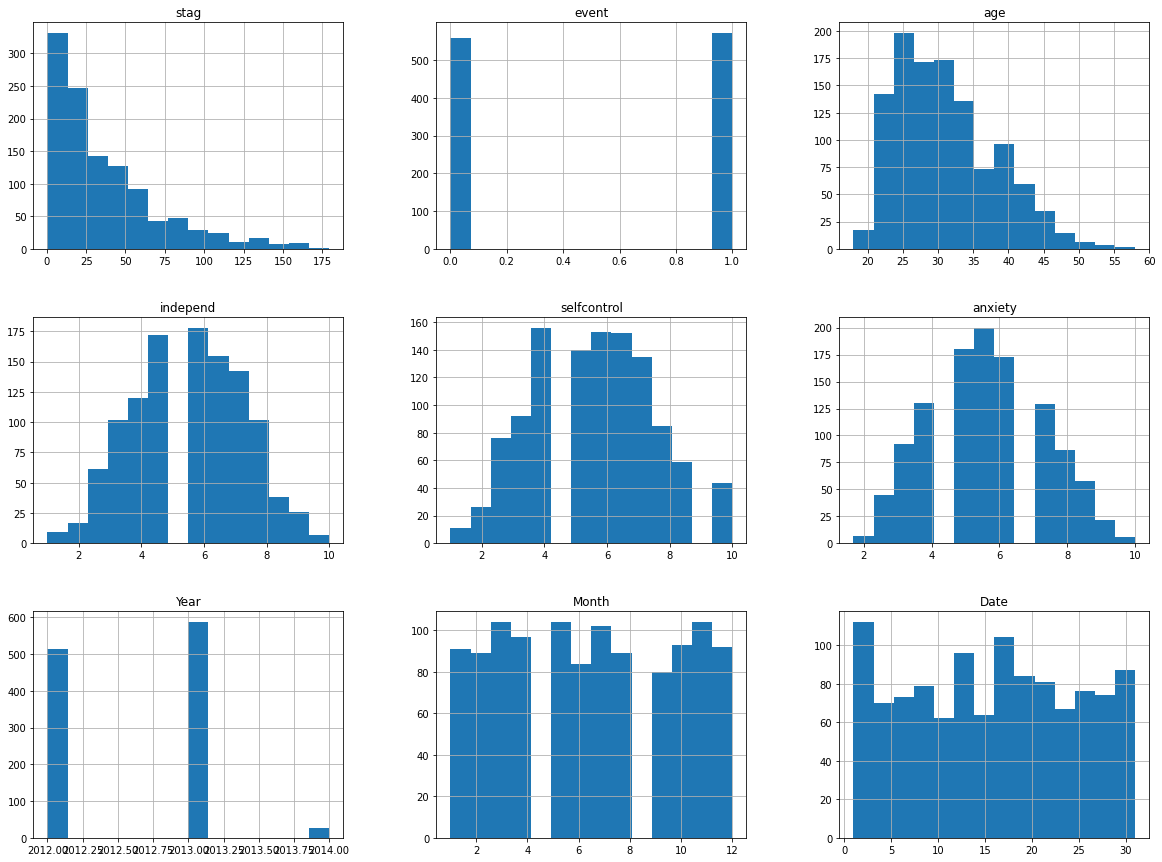

In [25]:
num_bins = 14
df.hist(bins=num_bins, figsize=(20,15))
plt.show()

# Data Visualization

## Gender

In [26]:
df['gender'].value_counts()

f    853
m    276
Name: gender, dtype: int64

In [27]:
df[['gender' , 'event']].groupby('gender').mean().sort_values(by='event')

,event
gender,
m,0.489130
f,0.511137


### The % of female employee terminated  is slightly more than males.

In [28]:
pd.crosstab(df.gender , df.event, margins=True , normalize=True)

event,0,1,All
gender,,,
f,0.369353,0.386182,0.755536
m,0.124889,0.119575,0.244464
All,0.494243,0.505757,1.000000


Text(0, 0.5, 'Frequency of turnover')

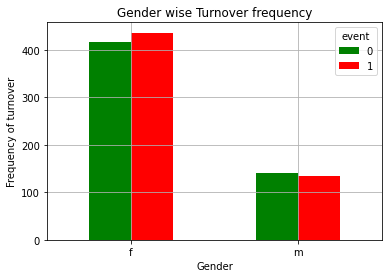

In [29]:
pd.crosstab(df.gender,df.event).plot(kind='bar',color=('green','red'))
plt.xticks(rotation='horizontal')
plt.grid()
plt.title('Gender wise Turnover frequency')
plt.xlabel('Gender')
plt.ylabel('Frequency of turnover')


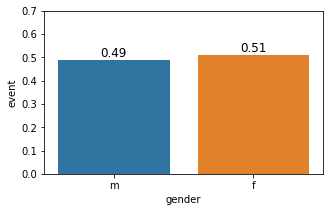

In [30]:
fig_dims=(5,3)
fig,ax=plt.subplots(figsize=fig_dims)
fig,ax=plt.xticks(rotation='horizontal')
fig,ax=plt.ylim(0,0.7)
sns.barplot(x='gender',y='event',data=df,ci=None)

ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=12,color='black',ha='center',va='bottom')
plt.savefig('gender.png',dpi=300)    

### More female is terminated from the job than male.

## Age

In [31]:
dr=df.groupby('event')
dt=dr.get_group(1)
dt['gender'].value_counts()
#de=dt.groupby('gender')
#t=de.get_group('m')
#w=t['age'].value_counts()
#dt['independ'].value_counts()

f    436
m    135
Name: gender, dtype: int64

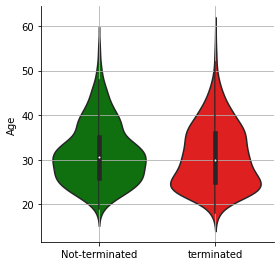

In [32]:
g=sns.catplot( y='age',x='event' , data=df  , kind='violin' , palette=['green','red'],height=4,legend=True)
(g.set_axis_labels("", "Age")
  .set_xticklabels(["Not-terminated" , "terminated"]))

plt.grid()
plt.savefig('age.png',dpi=300)

## Industry

In [33]:
pd.crosstab(df.industry , df.event,margins=True ,normalize=True)

event,0,1,All
industry,,,
HoReCa,0.004429,0.005314,0.009743
Agriculture,0.004429,0.008857,0.013286
Banks,0.034544,0.066430,0.100974
Building,0.008857,0.027458,0.036315
Consult,0.025686,0.039858,0.065545
IT,0.077945,0.030115,0.108060
Mining,0.008857,0.012400,0.021258
Pharma,0.007972,0.009743,0.017715
PowerGeneration,0.020372,0.013286,0.033658


In [34]:
df[['industry' , 'event']].groupby('industry').mean().sort_values(by='event')

,event
industry,
IT,0.278689
RealEstate,0.384615
Telecom,0.388889
PowerGeneration,0.394737
transport,0.421053
Retail,0.470588
manufacture,0.482759
HoReCa,0.545455
Pharma,0.550000


### % of employee in different industry who terminated from their job.

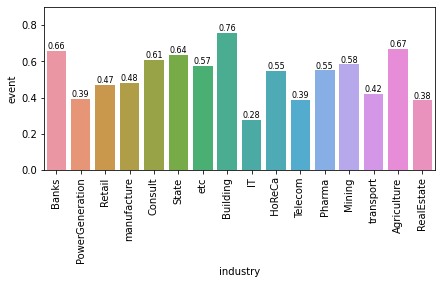

In [35]:
fig_dim=(7,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='vertical')
fig,ax=plt.ylim(0,0.9)
sns.barplot(x='industry',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('industry.png',dpi=300)
    

Text(0, 0.5, 'Frequency of turnover')

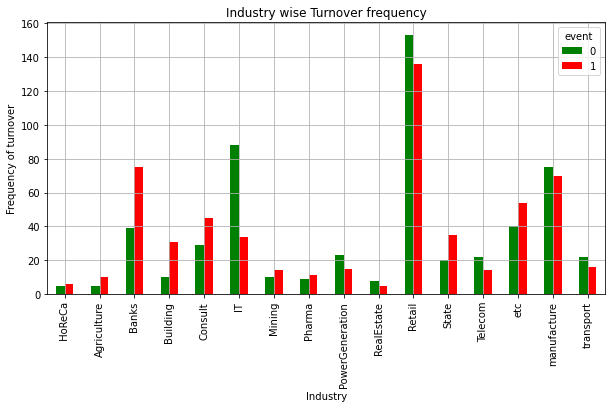

In [36]:
pd.crosstab(df.industry , df.event ).plot(kind='bar',color=('green','red'),figsize=(10,5))
plt.xticks(rotation='vertical')
plt.grid()
plt.title('Industry wise Turnover frequency')
plt.xlabel('Industry')
plt.ylabel('Frequency of turnover')


### In 'Building' most of the employees is terminated.

### Traffic

In [37]:
pd.crosstab(df.traffic,df.event,margins=True)

event,0,1,All
traffic,,,
KA,31,36,67
advert,20,13,33
empjs,118,130,248
friends,76,42,118
rabrecNErab,84,127,211
recNErab,20,19,39
referal,32,63,95
youjs,177,141,318
All,558,571,1129


In [38]:
df[['traffic' , 'event']].groupby('traffic').mean().sort_values(by='event')

,event
traffic,
friends,0.355932
advert,0.393939
youjs,0.443396
recNErab,0.487179
empjs,0.524194
KA,0.537313
rabrecNErab,0.601896
referal,0.663158


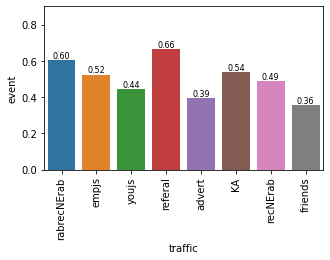

In [39]:
fig_dim=(5,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='vertical')
fig,ax=plt.ylim(0,0.9)
sns.barplot(x='traffic',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('traffic.png',dpi=300)
    

Text(0, 0.5, 'Frequency of turnover')

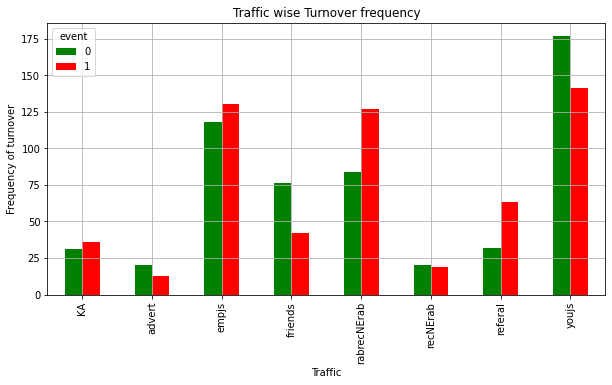

In [40]:
pd.crosstab(df.traffic,df.event).plot(kind='bar',color=('green','red',),figsize=(10,5))
plt.xticks(rotation='vertical')
plt.grid()
plt.title('Traffic wise Turnover frequency')
plt.xlabel('Traffic')
plt.ylabel('Frequency of turnover')

### Employee who knows about the job through referal are more likely to terminate.

## Coach

In [41]:
pd.crosstab(df.coach , df.event , margins=True )

event,0,1,All
coach,,,
my head,169,145,314
no,332,351,683
yes,57,75,132
All,558,571,1129


In [42]:
df[['coach','event']].groupby('coach').mean().sort_values(by='event')

,event
coach,
my head,0.461783
no,0.513909
yes,0.568182


Text(0, 0.5, 'Frequency of turnover')

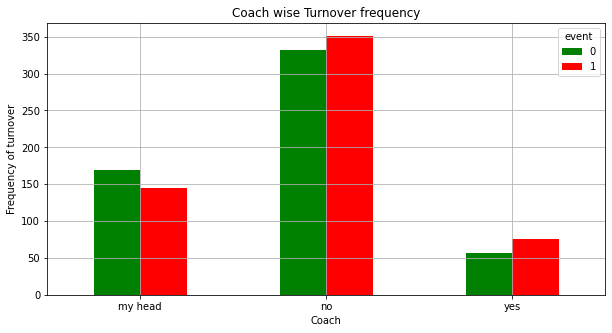

In [43]:
pd.crosstab(df.coach , df.event ).plot(kind='bar',color=('g','r'),figsize=(10,5))
plt.xticks(rotation='horizontal')
plt.grid()
plt.title('Coach wise Turnover frequency')
plt.xlabel('Coach')
plt.ylabel('Frequency of turnover')


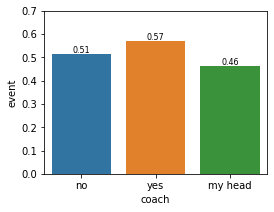

In [44]:
fig_dim=(4,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='horizontal')
fig,ax=plt.ylim(0,0.7)
sns.barplot(x='coach',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('coach.png',dpi=300)
    

### Employee having a coach is more likely to terminate.

## head_gender

In [45]:
df[['head_gender','event']].groupby('head_gender').mean().sort_values(by='event')

,event
head_gender,
f,0.484404
m,0.525685


In [46]:
pd.crosstab(df.head_gender , df.event , margins=True )

event,0,1,All
head_gender,,,
f,281,264,545
m,277,307,584
All,558,571,1129


Text(0, 0.5, 'Frequency of turnover')

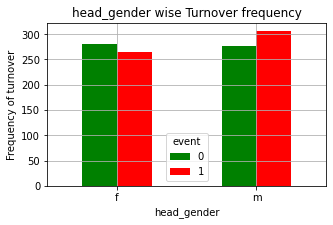

In [47]:
pd.crosstab(df.head_gender , df.event ).plot(kind='bar',color=('g','r'),figsize=(5,3))
plt.xticks(rotation='horizontal')
plt.grid()
plt.title('head_gender wise Turnover frequency')
plt.xlabel('head_gender')
plt.ylabel('Frequency of turnover')

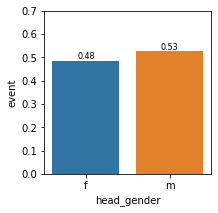

In [48]:
fig_dim=(3,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='horizontal')
fig,ax=plt.ylim(0,0.7)
sns.barplot(x='head_gender',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('head_gender.png',dpi=300)
    

### Employee with male head are slightly more likely to terminate from their job.

## Greywage

In [49]:
df[['greywage','event']].groupby('greywage').mean().sort_values(by='event')

,event
greywage,
white,0.497006
grey,0.574803


Text(0, 0.5, 'Frequency of turnover')

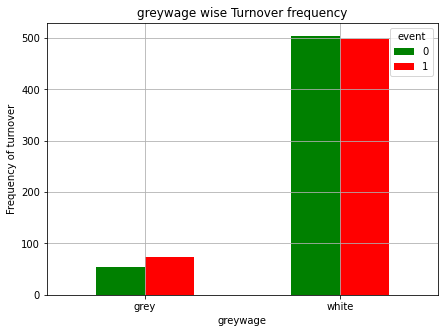

In [50]:
pd.crosstab(df.greywage , df.event ).plot(kind='bar',color=('g','r'),figsize=(7,5))
plt.xticks(rotation='horizontal')
plt.grid()
plt.title('greywage wise Turnover frequency')
plt.xlabel('greywage')
plt.ylabel('Frequency of turnover')

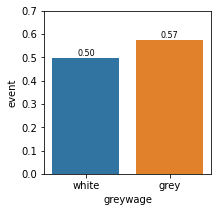

In [51]:
fig_dim=(3,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='horizontal')
fig,ax=plt.ylim(0,0.7)
sns.barplot(x='greywage',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('greywage.png',dpi=300)

### Employees with grey wages are more likely to terminate from their job.

## Way

In [52]:
pd.crosstab(df.way , df.event,margins=True )

event,0,1,All
way,,,
bus,327,354,681
car,157,174,331
foot,74,43,117
All,558,571,1129


Text(0, 0.5, 'Frequency of turnover')

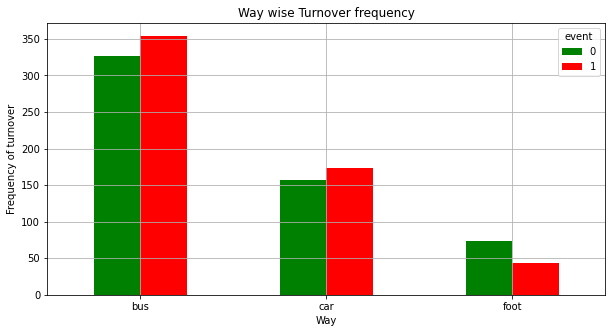

In [53]:
pd.crosstab(df.way , df.event).plot(kind='bar',color=('g','r'),figsize=(10,5))
plt.xticks(rotation='horizontal')
plt.grid()
plt.title('Way wise Turnover frequency')
plt.xlabel('Way')
plt.ylabel('Frequency of turnover')

In [54]:
df[['way' , 'event']].groupby('way').mean().sort_values(by='event')

,event
way,
foot,0.367521
bus,0.519824
car,0.525680


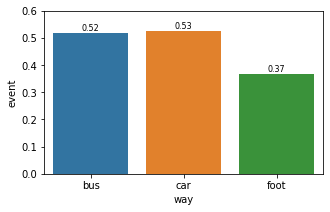

In [55]:
fig_dim=(5,3)
fig,ax=plt.subplots(figsize=fig_dim)
fig,ax=plt.xticks(rotation='horizontal')
fig,ax=plt.ylim(0,0.6)
sns.barplot(x='way',y='event',data=df,ci=None)
ax=plt.gca()
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.2f' % float(p.get_height()),fontsize=8,color='Black',ha='center',va='bottom')
plt.savefig('way.png')    


### 53% employee whose mode of transportation is car is terminated.

## independ

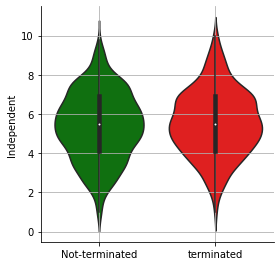

In [56]:
g=sns.catplot( y='independ',x='event' , data=df  , kind='violin' , palette=['green','red'] , height=4 , legend=True)
(g.set_axis_labels("", "Independent")
  .set_xticklabels(["Not-terminated" , "terminated"]))

plt.grid()
plt.savefig('independ.png',dpi=300)

####  Most of the employee who terminate from their job has a rating in the range 4.8 to 5.5

## Selfcontrol

In [57]:
df['selfcontrol'].value_counts()

4.1     156
5.7     153
6.4     152
4.9     140
7.2     135
3.3      92
8.0      85
2.6      76
8.7      59
9.5      31
1.8      26
10.0     13
1.0      11
Name: selfcontrol, dtype: int64

In [58]:
df[['selfcontrol' , 'event']].groupby('selfcontrol').mean().sort_values(by='event')

,event
selfcontrol,
8.7,0.406780
8.0,0.411765
9.5,0.451613
4.1,0.461538
6.4,0.493421
1.8,0.500000
2.6,0.500000
3.3,0.521739
7.2,0.525926


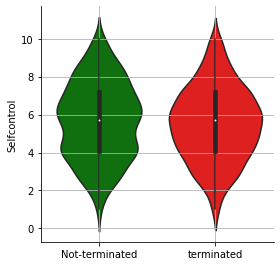

In [59]:
g=sns.catplot( y='selfcontrol',x='event' , data=df  , kind='violin' , palette=['green','red'] , height=4 , legend=True)
(g.set_axis_labels("", "Selfcontrol")
  .set_xticklabels(["Not-terminated" , "terminated"]))

plt.grid()
plt.savefig('selfcontrol.png',dpi=300)

### Most of the employees with rating  6 has terminated from their job.

## Anxiety

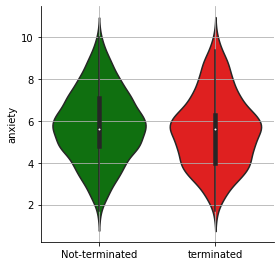

In [60]:
g=sns.catplot( y='anxiety',x='event' , data=df  , kind='violin' , palette=['green','red'] , height=4 , legend=True)
(g.set_axis_labels("", "anxiety")
  .set_xticklabels(["Not-terminated" , "terminated"]))

plt.grid()
plt.savefig('anxiety.png',dpi=300)

### Employee with anxiety rating around 6 are more likely to terminate from their job.

### Kaplan-meier curve

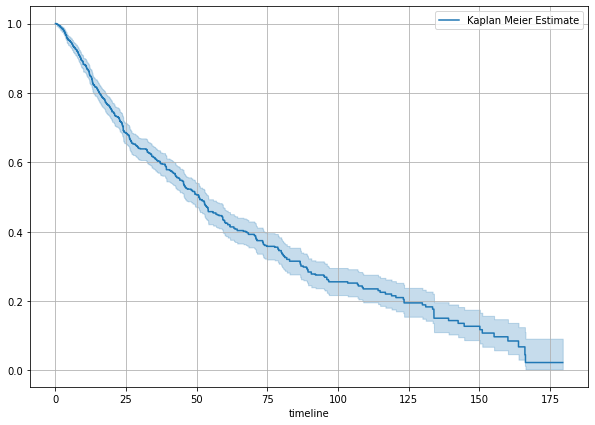

<Figure size 432x288 with 0 Axes>

In [61]:
T = df['stag']
E = df['event']
km = KaplanMeierFitter() 
plt.figure(figsize=(10,7))
km.fit(T, E,label='Kaplan Meier Estimate')
km.plot(ci_show=True) ## ci_show is meant for Confidence interval
plt.grid()
plt.show()
plt.savefig('km0.jpg',dpi=300)

In [62]:
df['industry']=df['industry'].replace({'PowerGeneration':'Pharma','Telecom':'Pharma','Agriculture':'Pharma','RealEstate':'Pharma','etc':'Pharma',' HoReCa':'Pharma',
       'Mining':'Pharma', 'transport':'Pharma'})

df['industry']=np.where(df['industry'] =='Pharma','Others', df['industry'])
df['industry'].value_counts()

Others         289
Retail         289
manufacture    145
IT             122
Banks          114
Consult         74
State           55
Building        41
Name: industry, dtype: int64

In [63]:
df.columns

Index(['stag', 'event', 'gender', 'age', 'industry', 'traffic', 'coach',
       'head_gender', 'greywage', 'way', 'independ', 'selfcontrol', 'anxiety',
       'Year', 'Month', 'Date'],
      dtype='object')

In [64]:
def map_all(frame):
    # Map Sex
    frame['gender'] = frame.gender.map({'m': 0 ,  'f': 1}).astype(int) 
    # Map profession
    #frame['profession'] = frame.profession.map({'HR' : 0 , 'IT': 1 , 'Consult':2 , 'etc':3 , 'Marketing': 4 ,'BusinessDevelopment' :5 , 'Others': 6}).astype(int) 
    # Map industry
    frame['industry'] = frame.industry.map({'Building' : 0 , 'Consult': 1 , 'Banks':2 , 'Retail':3 , 'manufacture': 4 ,'State' :5 , 'IT':6,'Others': 7}).astype(int)  
    # Map way
    frame['way'] = frame.way.map({'bus' : 0 , 'car': 1 , 'foot':2}).astype(int)   
    # Map traffic
    frame['traffic'] = frame.traffic.map({'youjs' : 0 , 'empjs': 1 , 'rabrecNErab':2 , 'friends':3 , 'referal': 4 ,'KA' :5 , 'recNErab':6, 'advert':7}).astype(int)  
    # Map greywage
    frame['greywage'] = frame.greywage.map({'white' : 0 , 'grey': 1 }).astype(int) 
    # Map coach
    frame['coach'] = frame.coach.map({'no' : 0 , 'yes': 1 , 'my head':2 }).astype(int) 
    # Map head_gender
    frame['head_gender'] = frame.head_gender.map({'m' : 0 , 'f': 1 }).astype(int)  
  

In [65]:
map_all(df)

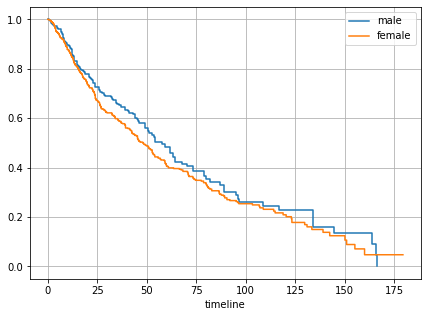

<Figure size 432x288 with 0 Axes>

In [66]:
T = df['stag']
E = df['event']

km_2 = KaplanMeierFitter()

groups = df['gender']   
i1 = (groups == 0)   
i2 = (groups == 1)  

plt.figure(figsize=(7,5))
ax=plt.subplot()

## fit the model for 1st group
km_2.fit(T[i1], E[i1], label='male')
km_2.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_2.fit(T[i2], E[i2], label='female')
km_2.plot(ax=ax,ci_show=False)
plt.grid()
plt.show()
plt.savefig('km1.png',dpi=300)



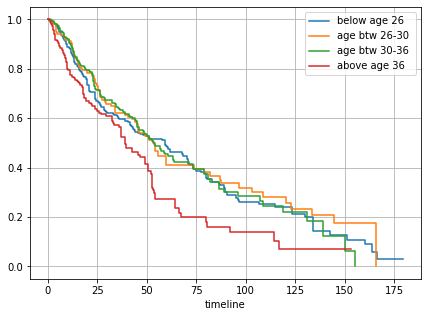

<Figure size 432x288 with 0 Axes>

In [67]:
km_3 = KaplanMeierFitter()

groups=df['age']
g1=(groups<=26)  
g2=(groups>26) & (groups<=30)
g3=(groups>30) & (groups<=36)
g4=(groups>36)
plt.figure(figsize=(7,5))
ax=plt.subplot()

## fit the model for 1st group
km_3.fit(T[g1], E[g1], label='below age 26')
km_3.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_3.fit(T[g2], E[g2], label='age btw 26-30')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g3], E[g3], label='age btw 30-36 ')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g4], E[g4], label='above age 36')
km_3.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km2.png',dpi=300)

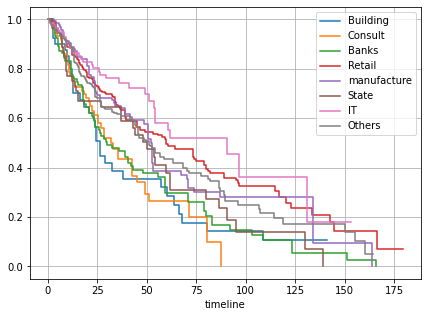

<Figure size 432x288 with 0 Axes>

In [68]:
km_4 = KaplanMeierFitter()

groups=df['industry']
g1=(groups==0)  
g2=(groups==1)
g3=(groups==2)
g4=(groups==3)
g5=(groups==4)
g6=(groups==5)
g7=(groups==6)
g8=(groups==7)

plt.figure(figsize=(7,5))
ax=plt.subplot()

## fit the model for 1st group
km_4.fit(T[g1], E[g1], label='Building')
km_4.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_4.fit(T[g2], E[g2], label='Consult')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g3], E[g3], label='Banks')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g4], E[g4], label='Retail')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g5], E[g5], label='manufacture')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g6], E[g6], label='State')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g7], E[g7], label='IT')
km_4.plot(ax=ax,ci_show=False)

km_4.fit(T[g8], E[g8], label='Others')
km_4.plot(ax=ax,ci_show=False)

plt.grid()
plt.show()
plt.savefig('km4.png',dpi=300)

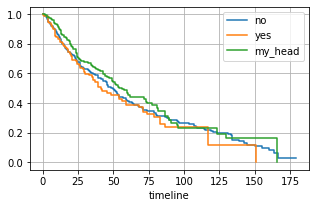

<Figure size 432x288 with 0 Axes>

In [69]:
km_6 = KaplanMeierFitter()

groups=df['coach']
g1=(groups==0)  
g2=(groups==1)
g3=(groups==2)


plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_6.fit(T[g1], E[g1], label='no')
km_6.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_6.fit(T[g2], E[g2], label='yes')
km_6.plot(ax=ax,ci_show=False)

km_6.fit(T[g3], E[g3], label='my_head')
km_6.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km5.png',dpi=300)

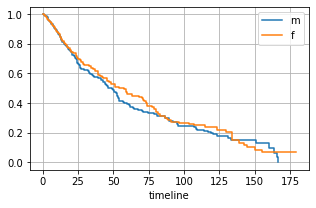

<Figure size 432x288 with 0 Axes>

In [70]:
km_6 = KaplanMeierFitter()

groups=df['head_gender']
g1=(groups==0)  
g2=(groups==1)

plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_6.fit(T[g1], E[g1], label='m')
km_6.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_6.fit(T[g2], E[g2], label='f')
km_6.plot(ax=ax,ci_show=False)

plt.grid()
plt.show()
plt.savefig('km6.png',dpi=300)

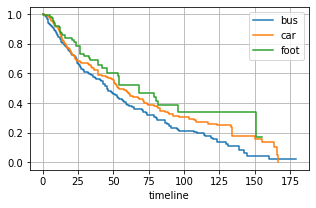

<Figure size 432x288 with 0 Axes>

In [71]:
km_6 = KaplanMeierFitter()

groups=df['way']
g1=(groups==0)  
g2=(groups==1)
g3=(groups==2)


plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_6.fit(T[g1], E[g1], label='bus')
km_6.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_6.fit(T[g2], E[g2], label='car')
km_6.plot(ax=ax,ci_show=False)

km_6.fit(T[g3], E[g3], label='foot')
km_6.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km7.png',dpi=300)

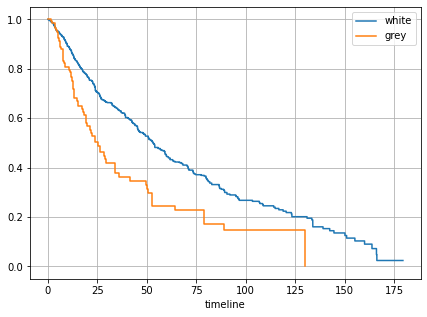

<Figure size 432x288 with 0 Axes>

In [72]:
km_7 = KaplanMeierFitter()

groups=df['greywage']
g1=(groups==0)  
g2=(groups==1)

plt.figure(figsize=(7,5))
ax=plt.subplot()

## fit the model for 1st group
km_7.fit(T[g1], E[g1], label='white')
km_7.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_7.fit(T[g2], E[g2], label='grey')
km_7.plot(ax=ax,ci_show=False)



plt.grid()
plt.show()
plt.savefig('km8.png',dpi=300)

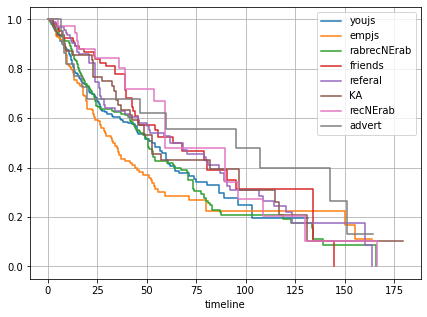

<Figure size 432x288 with 0 Axes>

In [73]:
km_8 = KaplanMeierFitter()

groups=df['traffic']
g1=(groups==0)  
g2=(groups==1)
g3=(groups==2)
g4=(groups==3)
g5=(groups==4)
g6=(groups==5)
g7=(groups==6)
g8=(groups==7)


plt.figure(figsize=(7,5))
ax=plt.subplot()

## fit the model for 1st group
km_8.fit(T[g1], E[g1], label='youjs')
km_8.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_8.fit(T[g2], E[g2], label='empjs')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g3], E[g3], label='rabrecNErab')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g4], E[g4], label='friends')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g5], E[g5], label='referal')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g6], E[g6], label='KA')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g7], E[g7], label='recNErab')
km_8.plot(ax=ax,ci_show=False)

km_8.fit(T[g8], E[g8], label='advert')
km_8.plot(ax=ax,ci_show=False)
plt.grid()
plt.show()
plt.savefig('km9.png',dpi=300)

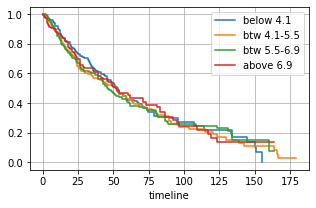

<Figure size 432x288 with 0 Axes>

In [74]:
km_3 = KaplanMeierFitter()

groups=df['independ']
g1=(groups<=4.1)  
g2=(groups>4.1) & (groups<=5.5)
g3=(groups>5.5) & (groups<=6.9)
g4=(groups>6.9)
plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_3.fit(T[g1], E[g1], label='below 4.1')
km_3.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_3.fit(T[g2], E[g2], label='btw 4.1-5.5')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g3], E[g3], label='btw 5.5-6.9')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g4], E[g4], label='above 6.9')
km_3.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km10.png',dpi=300)

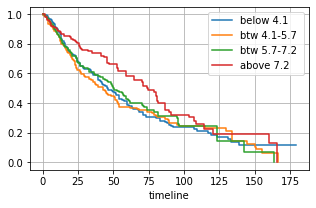

<Figure size 432x288 with 0 Axes>

In [75]:
km_3 = KaplanMeierFitter()

groups=df['selfcontrol']
g1=(groups<=4.1)  
g2=(groups>4.1) & (groups<=5.7)
g3=(groups>5.7) & (groups<=7.2)
g4=(groups>7.2)
plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_3.fit(T[g1], E[g1], label='below 4.1')
km_3.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_3.fit(T[g2], E[g2], label='btw 4.1-5.7')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g3], E[g3], label='btw 5.7-7.2 ')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g4], E[g4], label='above 7.2')
km_3.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km11.png',dpi=300)

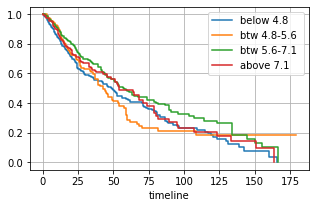

<Figure size 432x288 with 0 Axes>

In [76]:
km_3 = KaplanMeierFitter()

groups=df['anxiety']
g1=(groups<=4.8)  
g2=(groups>4.8) & (groups<=5.6)
g3=(groups>5.6) & (groups<=7.1)
g4=(groups>7.1)
plt.figure(figsize=(5,3))
ax=plt.subplot()

## fit the model for 1st group
km_3.fit(T[g1], E[g1], label='below 4.8')
km_3.plot(ax=ax,ci_show=False)

## fit the model for 2nd group
km_3.fit(T[g2], E[g2], label='btw 4.8-5.6')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g3], E[g3], label='btw 5.6-7.1 ')
km_3.plot(ax=ax,ci_show=False)

km_3.fit(T[g4], E[g4], label='above 7.1')
km_3.plot(ax=ax,ci_show=False)


plt.grid()
plt.show()
plt.savefig('km12.png',dpi=300)

In [77]:
# Create Model
cph = CoxPHFitter(penalizer=0.1)

# Fit the data to train the model
cph.fit(df, 'stag', event_col='event')

# Have a look at the significance of the features
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1129 total observations, 558 right-censored observations>
             duration col = 'stag'
                event col = 'event'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1129
number of events observed = 571
   partial log-likelihood = -3437.93
         time fit was run = 2022-09-06 04:26:34 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
gender        0.07       1.08       0.10            -0.11             0.26                 0.89                 1.30
age           0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
industry     -0.05       0.95       0.02            -0.09            -0.01                 0.92                 0.99
traffic      -0.07       0.93       0.02            -0.11            -0.03                 0.90                 0.97
coach        -0.03       0.97       0.05            -0.12             0.06                 0.89                 1.06
head_gender  -0.04       0.96       0.08            -0.20             0.11                 0.82                 1.12
greywage      0.43       1.54       0.12             0.19             0.67                 1.21                 1.95
way          -0.16       0.86       0.06            -0.28            -0.04                 0.76                 0.96
independ     -0.00       1.00       0.02            -0.05             0.05                 0.95                 1.05
selfcontrol  -0.06       0.94       0.02            -0.10            -0.02                 0.91                 0.98
anxiety      -0.04       0.96       0.03            -0.09             0.01                 0.91                 1.01
Year          0.07       1.07       0.07            -0.07             0.21                 0.93                 1.23
Month         0.01       1.01       0.01            -0.02             0.03                 0.98                 1.03
Date          0.01       1.01       0.00            -0.00             0.01                 1.00                 1.01

              cmp to     z      p   -log2(p)
covariate                                   
gender          0.00  0.78   0.43       1.21
age             0.00  2.85 <0.005       7.85
industry        0.00 -2.66   0.01       7.01
traffic         0.00 -3.25 <0.005       9.77
coach           0.00 -0.73   0.47       1.10
head_gender     0.00 -0.55   0.58       0.78
greywage        0.00  3.56 <0.005      11.37
way             0.00 -2.58   0.01       6.67
independ        0.00 -0.03   0.98       0.03
selfcontrol     0.00 -2.87 <0.005       7.93
anxiety         0.00 -1.63   0.10       3.27
Year            0.00  0.93   0.35       1.50
Month           0.00  0.46   0.64       0.63
Date            0.00  1.17   0.24       2.04
---
Concordance = 0.62
Partial AIC = 6903.87
log-likelihood ratio test = 64.74 on 14 df
-log2(p) of ll-ratio test = 25.81

<AxesSubplot:xlabel='log(HR) (95% CI)'>

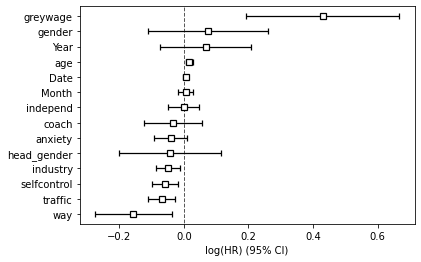

In [78]:
cph.plot()

In [79]:
def map_all(frame):
    # Map age
    #age varies from 18 to 58, therefore 4 categories map to range of 10.
    frame.loc[frame.age <= 26 , 'age'] = 0
    frame.loc[(frame.age >26) & (frame.age<=30) , 'age'] = 1
    frame.loc[(frame.age >30) & (frame.age<=36) , 'age'] = 2
    frame.loc[(frame.age >36) , 'age'] = 3
    
    
    # Map independ
    # independ varies from 1 to 10 and we will map it depending upon the quartile variation.
    # i.e 25% -> 4.1 , 50% -> 5.5 , 75% -> 6.9
    frame.loc[(frame.independ <= 4.1) , 'independ'] = 0
    frame.loc[(frame.independ > 4.1) & (frame.independ <= 5.5) , 'independ'] = 1
    frame.loc[(frame.independ > 5.5) & (frame.independ <= 6.9) , 'independ'] = 2
    frame.loc[(frame.independ > 6.9) , 'independ'] = 3

     # Map self control
    # selfcontrol varies from 1 to 10 and we will map it depending upon the quartile variation.
    # i.e 25% -> 4.1 , 50% -> 5.7 , 75% -> 7.2
    frame.loc[(frame.selfcontrol <= 4.1) , 'selfcontrol'] = 0
    frame.loc[(frame.selfcontrol > 4.1) & (frame.selfcontrol <= 5.7) , 'selfcontrol'] = 1
    frame.loc[(frame.selfcontrol > 5.7) & (frame.selfcontrol <= 7.2) , 'selfcontrol'] = 2
    frame.loc[(frame.selfcontrol > 7.2) , 'selfcontrol'] = 3

    # Map anxiety
    # anxiety varies from 1 to 10 and we will map it depending upon the quartile variation.
    # i.e 25% -> 4.8 , 50% -> 5.6 , 75% -> 7.1
    frame.loc[(frame.anxiety <= 4.8) , 'anxiety'] = 0
    frame.loc[(frame.anxiety > 4.8) & (frame.anxiety <= 5.6) , 'anxiety'] = 1
    frame.loc[(frame.anxiety > 5.6) & (frame.anxiety <= 7.1) , 'anxiety'] = 2
    frame.loc[(frame.anxiety > 7.1) , 'anxiety'] = 3
    

    # Map stag
    # stag varies from 0.394250513 to 179.449692 and we will map it depending upon the quartile variation.
    # i.e 25% ->11.72895277  , 50% ->24.3449692 , 75% ->51.31827515 
    frame.loc[(frame.stag <=11.72895277 ) , 'stag'] = 0
    frame.loc[(frame.stag >11.72895277 ) & (frame.stag <24.3449692) , 'stag'] = 1
    frame.loc[(frame.stag>24.3449692 ) & (frame.stag <=51.31827515 ) , 'stag'] = 2
    frame.loc[(frame.stag >51.31827515 ) , 'stag'] = 3


    
    frame.loc[(frame.Year ==2012 ) , 'Year'] = 0
    frame.loc[(frame.Year ==2013 ) , 'Year'] = 1
    frame.loc[(frame.Year ==2014 ) , 'Year'] = 2
    
    
    frame.loc[(frame.Month <=3 ) , 'Month'] = 0
    frame.loc[(frame.Month >3 ) & (frame.Month <= 6) , 'Month'] = 1
    frame.loc[(frame.Month>6 ) & (frame.Month <= 10) , 'Month'] = 2
    frame.loc[(frame.Month >10 ) , 'Month'] = 3
    
    
    frame.loc[(frame.Date <=8 ) , 'Date'] = 0
    frame.loc[(frame.Date >8 ) & (frame.Date <=16) , 'Date'] = 1
    frame.loc[(frame.Date >16 ) & (frame.Date <=23 ) , 'Date'] = 2
    frame.loc[(frame.Date >23 ) , 'Date'] = 3

In [80]:
df.dtypes

stag           float64
event            int64
gender           int32
age            float64
industry         int32
traffic          int32
coach            int32
head_gender      int32
greywage         int32
way              int32
independ       float64
selfcontrol    float64
anxiety        float64
Year             int32
Month            int32
Date             int32
dtype: object

In [81]:
X=df.drop(['stag'],axis=1)##independent features
y=df['stag']##dependent features

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=66)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
df.dtypes

(790, 15) (339, 15) (790,) (339,)


stag           float64
event            int64
gender           int32
age            float64
industry         int32
traffic          int32
coach            int32
head_gender      int32
greywage         int32
way              int32
independ       float64
selfcontrol    float64
anxiety        float64
Year             int32
Month            int32
Date             int32
dtype: object

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-1103.343149947636


In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-1096.7640532120379


In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-1098.891550712509


In [86]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

In [87]:
y_test

454     32.459959
117     27.367556
22      22.472279
971     19.942505
551     15.408624
          ...    
968      5.749487
596      2.365503
699     15.178645
709    116.731006
464      5.782341
Name: stag, Length: 339, dtype: float64

<AxesSubplot:xlabel='stag', ylabel='Density'>

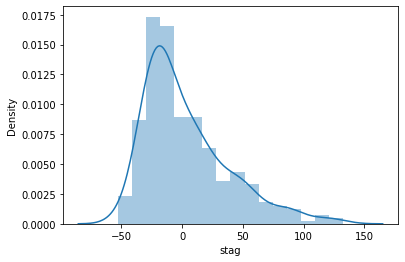

In [88]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

<AxesSubplot:xlabel='stag', ylabel='Density'>

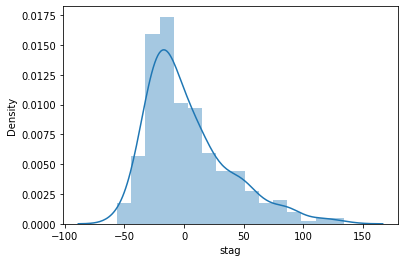

In [89]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)